## 3.2 De-anonymising a dataset – 50 marks
For this task, we are using a dataset provided to us by our colleagues. The Dataset has been anonymized using bayesian inferences. 
- Dataset:  
- Credits: 

### 3.2.1 Using standard search mechanisms, determine if there are any elements within the dataset that you received, that allow for de-anonymistaions to occur. Make a note of what you find and explain the procedure you used. 

### 3.2.2 Design a de-anonymisation algorithm and apply to both the received dataset and your dataset. Report on the following:

C:\Users\toplu\AppData\Local\Programs\Python\Python311\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.06712820584170896, -0.11945551778173198, -0.027404975276783986, -0.05480995055356797, -0.17114401574967358, -0.03875648771292728, -0.14758030840092828, -0.12255877528118023, -0.04746680955955883, -0.10254002817873605, -0.08666214109524076, -0.06127938764059011, -1.8514084113236846, -0.10613901285021037, -0.13973850370584937, -0.14240042867867647, -0.12854072793579904, -0.10961990110713594, -0.9252984619624639, -0.2209459742671819, -0.07250674926824392, -0.11626946313878184, -0.08221492583035196, -0.07751297542585456, -0.1370248763839199, -0.4315739822329922, -0.5877712379520839, -0.5045791068834172, -0.3026978455991705, -0.46102304236088143, -0.3980802599393254, -2.2684963862214245, -0.9240801619450221, -0.09493361911911766, -0.2013846175251269, -0.11299360773362095, -0.13142964432800638, -0.1797064406375272, -0.0988

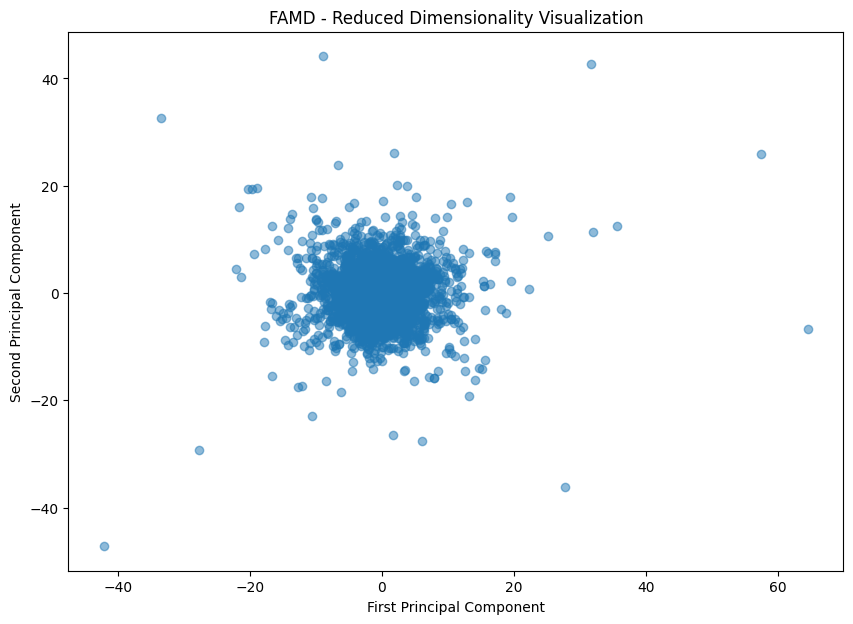

C:\Users\toplu\AppData\Local\Programs\Python\Python311\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.06712820584170896, -0.11945551778173198, -0.027404975276783986, -0.05480995055356797, -0.17114401574967358, -0.03875648771292728, -0.14758030840092828, -0.12255877528118023, -0.04746680955955883, -0.10254002817873605, -0.08666214109524076, -0.06127938764059011, -1.8514084113236846, -0.10613901285021037, -0.13973850370584937, -0.14240042867867647, -0.12854072793579904, -0.10961990110713594, -0.9252984619624639, -0.2209459742671819, -0.07250674926824392, -0.11626946313878184, -0.08221492583035196, -0.07751297542585456, -0.1370248763839199, -0.4315739822329922, -0.5877712379520839, -0.5045791068834172, -0.3026978455991705, -0.46102304236088143, -0.3980802599393254, -2.2684963862214245, -0.9240801619450221, -0.09493361911911766, -0.2013846175251269, -0.11299360773362095, -0.13142964432800638, -0.1797064406375272, -0.0988

ImportError: The "vegafusion" data transformer and chart.transformed_data feature requires
version 1.4.0 or greater of the 'vegafusion-python-embed' and 'vegafusion' packages.
These can be installed with pip using:
    pip install "vegafusion[embed]>=1.4.0"
Or with conda using:
    conda install -c conda-forge "vegafusion-python-embed>=1.4.0" "vegafusion>=1.4.0"

ImportError: vegafusion

alt.LayerChart(...)

In [35]:
import pandas as pd

# Load the dataset
df = pd.read_csv('police_shooting_anonymized.csv')
from prince import FAMD

# Initialize FAMD object: specifying the number of components (n_components)
famd = FAMD(n_components=2, n_iter=3, random_state=42)

# Fit FAMD on the dataset
famd = famd.fit(df)

# Transform the dataset
df_transformed = famd.transform(df)
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Assuming 'df_transformed' is the DataFrame obtained after applying FAMD
z_scores = np.abs(stats.zscore(df_transformed))
outliers = np.where(z_scores > 3)

# 'outliers' now contains the indices of the outliers in the transformed dataset
# Assuming outliers are in rows
outlier_rows = df.iloc[outliers[0]]
outlier_rows.to_csv('outliers.csv', index=False)

# Plotting the transformed dataset
plt.figure(figsize=(10, 7))
plt.scatter(df_transformed[0], df_transformed[1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('FAMD - Reduced Dimensionality Visualization')
plt.show()
